# Redes Neurais (Neural Networks/Deep Learning)

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo
* Introdução
* O Problema de Regressão com Redes Neurais
* Arquitetura em Camadas
* Generalização para Múltiplos Inputs e Neurônios (Formulação Geral)
* Deep Learning
* Abordagem Computacional
  * Funções de Ativação
  * Visualizando as Funções de Ativação
  * Autograd: Calculando Gradientes Automaticamente
  * Otimizador: Automatizando a Atualização dos Parâmetros
  * Construindo uma Rede Neural no PyTorch
  * Funções de Perda (Loss Functions)
  * Comparando Diferentes Otimizadores
  * Treinamento em Mini-lotes (Mini-batch Gradient Descent)
* Tópicos Avançados em Redes Neurais
* Aplicação de Redes Neurais em Python


### Referências

* [An Introduction to Statistical Learning](https://www.statlearning.com/) (ISL) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani
  * Capítulo 10
* [The Elements of Statistical Learning](https://hastie.su.domains/ElemStatLearn/) (ESL) by Trevor Hastie, Robert Tibshirani and Jerome Friedman : 

***Disclaimer:*** *O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer feedback ou sugestão de melhoria.*

**Configuração do Ambiente**

Observação importante. Eu tenho duas versões do Python instaladas no meu computador. A versão 3.11.15, e a versão 3.10.0. A versão 3.11.15 é a versão padrão do Python no meu computador, e a versão 3.10.0 é a versão que eu uso para executar o código deste material porque as bibliotecas de Redes Neurais que eu uso não são compatíveis com a versão 3.11.15.


In [1]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import everything
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import copy
import torch 
import torch.nn as nn
import torch.utils.data as Data
from torch.autograd import Variable
from sklearn.linear_model import LinearRegression
from torchviz import make_dot

# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import clear_output

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-v0_8-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

### Introdução

Vimos na aula anterior:

* **Modelos baseados em árvores**: Árvores de Decisão, Bagging, Random Forest, Gradient Boosting  
  * Eles são eficazes para variáveis bem definidas, relações não-lineares e interações entre atributos.

Entretanto, esses modelos apresentam **limitações**:

* Dificuldade com dados complexos: ***imagens, áudio, texto, séries temporais com dependência sequencial***.

Para superar essas limitações, avançamos agora para o estudo dos modelos de **Redes Neurais**, uma classe de modelos de aprendizado de máquina **inspirada na arquitetura do cérebro humano**.

***Neurônio Natural***

<div style="text-align:center;">
    <img src="images\neuronio.png"  alt="Imagem" style="width: 350px;"/>
</div>



***Rede Neural Artificial***

***Perceptron*** é o modelo mais simples de rede neural, que consiste em uma única camada de neurônios. 

<div style="text-align:center;">
    <img src="images\perceptron.png"  alt="Imagem" style="width: 350px;"/>
</div>

* Entradas ($x_1, x_2, ..., x_m$)
* Pesos ($w_1, w_2, ..., w_m$)
* Viés ($b$)
* Somatório $\sum$, soma ponderada das entradas $z = w_1 x_1 + w_2 x_2 + ... + w_m x_m + b$
* Saída da Soma ($u$), resultado da soma ponderada das entradas e do viés: $u = z$
* Função de ativação ($f$)
* Saída ($y$)



***Uma camada de neurônios***

São unidades computacionais que recebem entradas, aplicam pesos e viés, e produzem uma saída. Cada neurônio realiza uma combinação linear das entradas, seguida de uma função de ativação não linear. A "*hidden layer*" é composta por múltiplos neurônios, permitindo que a rede aprenda representações mais complexas dos dados.

<div style="text-align:center;">
    <img src="images\HiddenLayer.png"  alt="Imagem" style="width: 500px;"/>
</div>

* *Imput layer*: Camada de entrada, onde os dados são recebidos.
* *Hidden layer*: Camada oculta, onde o processamento ocorre.
* *Output layer*: Camada de saída, onde as previsões são feitas.

A ideia desse exemplo é que cada `input` manda um sinal para todos os neurônios da camada oculta (`Hidden layer` - *fully connected layer ou dense layer*). Cada `neurônio` da *hidden layer* calcula uma combinação linear dos inputs, seguida de uma função de ativação (aqui ocorre a introdução de não linearidade). Por fim, cada neurônio da camada oculta se conecta ao único neurônio de saída (o `output`). Ou seja, grosso modo, os ***inputs são as features (X)***, as ***hidden layers são compostas por neurônios que realizam transformações internas não-lineares***, e o ***output é a previsão final (Y)***.

O objetivo das técnicas de Redes Neurais é aprender **representações internas complexas** dos dados. E elas são eficazes para resolver problemas envolvendo **grande volume de dados**, **alta dimensionalidade** e **estruturas espaciais ou temporais ricas**.

Ao longo desta aula, exploraremos os **fundamentos das Redes Neurais**, compreendendo desde a **estrutura básica de uma rede (*Perceptron*)** até as **redes mais profundas (*Deep Learning*)** que dominam muitas das aplicações atuais em **Visão Computacional**, **Processamento de Linguagem Natural** e **Inteligência Artificial moderna**.

Como essa é uma aula introdutória sobre o tema (*lembre que existem cursos semestrais só abordando isso*), vamos focar na arquitetura **"vanilla"** (básica), mais amplamente utilizada como ponto de partida: a **rede de retropropagação de camada oculta única**, ou **perceptron de múltiplas camadas com uma única camada escondida** (*single hidden layer feedforward network*).

### O Problema de Regressão com Redes Neurais

***Perceptron simples (*Single-layer perceptron*)***

Imagine um cenário com **duas variáveis de entrada** (denotadas por $x_1$ e $x_2$), e nenhum conhecimento prévio sobre a relação entre essas entradas e a variável de saída $y$, que queremos prever. Assumimos apenas que essa relação é, *a priori*, bastante **complexa e não linear**.

Nosso objetivo é aprender uma função $f(x_1, x_2)$ tal que ela seja um bom estimador de $y$.

Uma primeira tentativa seria um **modelo linear simples**:

$$
\hat{y} = w_1 x_1 + w_2 x_2
$$

Onde $w_1$ e $w_2$ são pesos (ou coeficientes) a serem estimados.

Observe que, neste exemplo, **não incluímos um termo constante**. No entanto, poderíamos facilmente introduzir um **termo de viés** (chamado de *bias* pela literatura de redes neurais) adicionando uma variável fictícia $x_0 = 1$.

Este modelo é fácil de entender e ajustar, mas possui uma limitação grave: **não captura não linearidades** (como vimos nas aulas anteriores).


***Funções de Ativação***

Para introduzir **não linearidade**, podemos modificar o modelo da seguinte forma:

$$
\hat{y} = g(w_1 x_1 + w_2 x_2)
$$

Onde $g(\cdot)$ é uma **função de ativação não linear**.

Uma função bastante conhecida na economia, por exemplo, é uma **sigmoide (logit)**:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

Outras funções comuns na literatura de redes neurais incluem (Verermos cada uma delas mais adiante):
* **tangente hiperbólica (tanh)**: produz valores entre -1 e 1.
* **ReLU (Rectified Linear Unit)**: é definida como $g(z) = \max(0, z)$, produzindo valores não negativos.
* **Sigmoid**: como mencionado, produzindo valores entre 0 e 1.
* **Softmax**: usada em problemas de classificação multiclasse, produzindo uma distribuição de probabilidade sobre as classes.

**Observação:** ***Até aqui, percebemos que essa abordagem é identica à aplicação de uma função de ativação em um modelo linear, como vimos em modelos de regressão logística.***

Vamos ver agora como isso se encaixa na arquitetura de uma rede neural.


### Arquitetura em Camadas

Vamos introduzir uma **camada oculta**, composta por **múltiplos neurônios**. A ideia central é construir **representações intermediárias não lineares** das variáveis de entrada antes de realizar a predição final, conforme ilustrado na imagem abaixo:


<div style="text-align:center;">
    <img src="images\Neural_1.png"  alt="Imagem" style="width: 650px;"/>
</div>

***Nessa imagem temos 4 inputs ($x_1$, $x_2$, $x_3$, $x_4$), 5 neurônios na camada oculta e 1 output ($y$).*** 

***Exemplo de uma rede neural com uma camada oculta***

Não se confunda com a Figura 10.1. Agora vamos seguir o exemplo com **duas variáveis de entrada** ($x_1$ e $x_2$), mas vamos ampliar para **três neurônios na camada oculta** ($h_1$, $h_2$, $h_3$). A saída final será $\hat{y}$. Fique tranquilo porque logo alí vamos generalizar para um número arbitrário de entradas e neurônios.


1. Primeiramente, geramos os componentes ocultos ($h_1$, $h_2$, $h_3$, por exemplo), a partir das entradas $x_1$ e $x_2$, utilizando diferentes combinações lineares seguidas de uma função de ativação:

$$
h_1 = g(w_{11} x_1 + w_{12} x_2)
$$

$$
h_2 = g(w_{21} x_1 + w_{22} x_2)
$$

$$
h_3 = g(w_{31} x_1 + w_{32} x_2)
$$

2. Em seguida, essas **saídas intermediárias** são combinadas novamente, agora de forma linear (ou não, dependendo da ativação final), para gerar a previsão da variável de interesse:

$$
\hat{y} = f\left( v_1 h_1 + v_2 h_2 + v_3 h_3 \right)
$$

Onde:

- Os $w_{ji}$ representam os **pesos da camada de entrada para a camada oculta**;
- Os $v_j$ correspondem aos **pesos da camada oculta para a saída**;
- $g(\cdot)$ é a **função de ativação das unidades ocultas** (ex.: ReLU, tanh);
- $f(\cdot)$ é a **função de ativação da camada de saída**, que pode ser uma função identidade (no caso de regressão) ou uma função como a sigmoide (em problemas de classificação binária).

**questões importantes para o procedimento:**  

* ***Dentro de uma mesma camada oculta, todos os neurônios aplicam a mesma função de ativação*** (ex.: ReLU, Tanh, etc.). O que torna as ativações diferentes entre os neurônios são os pesos e os bias individuais aprendidos por cada um. Essa padronização de ativação por camada é uma prática consagrada tanto pela teoria quanto pela eficiência computacional.
*  Cada $h_i$ funciona como uma **transformação não-linear** de uma combinação linear das entradas. Essa estrutura lembra a **parte interna de um modelo logit ou probit** (a etapa de transformação linear seguida de uma função não-linear), mas **sem ter uma interpretação probabilística individualizada por neurônio**. A rede neural irá então combinar os $h_i$ para produzir a saída $\hat{y}$, ajustando os pesos para minimizar a função de perda durante o treinamento.
*  **Inicialização Aleatória dos Pesos**. Antes do treinamento, os pesos ($w_{ij}$) de cada neurônio são inicializados aleatoriamente. Isso significa que, mesmo recebendo o mesmo input $x$, cada neurônio começa com combinações lineares diferentes das entradas. Já no primeiro *forward pass*, cada neurônio estará calculando um valor diferente de ativação (porque a entrada linear é diferente antes de aplicar a função $g$)



### Generalização para Múltiplos *Inputs* e Neurônios (Formulação Geral)

Entendido a lógica com um número pequeno de inputs e neurônios, podemos agora apresentar a formulação geral que será válida para **qualquer número de entradas ($p$) e de unidades ocultas ($K$)**.


***Ativação de cada neurônio da camada oculta:***

Para cada unidade $k$ da camada oculta ($k = 1, 2, ..., K$):

$$
A_k = h_k(X) = g \left( \sum_{j=1}^{p} w_{kj} X_j + b_k \right)
$$

Onde:

- $X = (X_1, X_2, ..., X_p)$ representa o vetor de entrada com $p$ variáveis explicativas;
- $w_{kj}$ é o peso que conecta a variável de entrada $X_j$ ao neurônio oculto $k$;
- $b_k$ é o termo de viés (bias) da unidade oculta $k$;
- $g(\cdot)$ é a **função de ativação da camada oculta**, que pode ser ReLU, Sigmoid, Tanh, etc.

***Combinação das ativações na camada de saída (Output Layer):***

Agora, utilizando todas as ativações $A_k$ da camada oculta, o modelo de saída (supondo regressão com uma única saída) é:

$$
f(X) = \sum_{k=1}^{K} \alpha_k A_k
$$

Onde:

- $\alpha_k$ são os pesos que conectam cada unidade da camada oculta ao neurônio de saída.

***Observação Importante***: Em problemas de regressão, muitas vezes não aplicamos nenhuma função de ativação final sobre $f(X)$. Já em **classificação**, uma função como **sigmoide** (para binária) ou **softmax** (para múltiplas classes) pode ser aplicada.

***Esse é o primeiro passo rumo a arquiteturas mais profundas (Deep Learning), onde empilhamos múltiplas camadas ocultas sucessivamente.***

### Deep Learning


Redes neurais podem ser **profundas** (*deep*), com **várias camadas ocultas**. Cada camada aprende representações mais complexas e abstratas dos dados, permitindo capturar padrões mais sofisticados.


<div style="text-align:center;">
    <img src="images\Neural_2.png"  alt="Imagem" style="width: 650px;"/>
</div>


A imagem representa uma rede neural *feedforward* profunda, com **duas camadas ocultas** e **múltiplas saídas**, típica de problemas de **classificação multiclasse**, como o caso do **MNIST (modelos de reconhecimento de dígitos manuscritos de 0 a 9)**.

***Forward Pass (Propagação Direta dos Sinais):***

**1. Primeira transformação (entrada na primeira *hidden layer*):**

Para cada neurônio $k$ da primeira camada oculta:

$$
A^{(1)}_k = g^{(1)}\left( \sum_{j=1}^{p} w^{(1)}_{kj} X_j + b^{(1)}_k \right)
$$

Onde:

- $w^{(1)}_{kj}$ = peso da conexão entre o input $X_j$ e o neurônio $k$ da primeira hidden layer.
- $b^{(1)}_k$ = bias do neurônio $k$.
- $g^{(1)}(\cdot)$ = função de ativação (exemplo: ReLU).

**2. Segunda transformação (primeira *hidden layer* na segunda *hidden layer*):**

Para cada neurônio $m$ da segunda hidden layer:

$$
A^{(2)}_m = g^{(2)}\left( \sum_{k=1}^{K_1} w^{(2)}_{mk} A^{(1)}_k + b^{(2)}_m \right)
$$

Onde:

- $w^{(2)}_{mk}$ = peso da conexão entre o neurônio $k$ da primeira camada e o neurônio $m$ da segunda camada.
- $b^{(2)}_m$ = bias da unidade $m$.
- $g^{(2)}(\cdot)$ = função de ativação (exemplo: ReLU).

**3. Saída final (segunda *hidden layer* na camada de saída):**

Para cada saída $q$ (uma para cada classe de dígito):

$$
f_q(X) = \sum_{m=1}^{K_2} \beta^{(q)}_m A^{(2)}_m + c_q
$$

Onde:

- $\beta^{(q)}_m$ = peso ligando o neurônio $m$ da segunda hidden layer à saída $q$.
- $c_q$ = bias da saída $q$.

Depois, aplica-se uma **função softmax** para transformar os $f_q(X)$ em probabilidades:

$$
\hat{P}(Y = q \mid X) = \frac{e^{f_q(X)}}{\sum_{q'=0}^{9} e^{f_{q'}(X)}}
$$


***Aprendizado (*Backpropagation*):***

*Backpropagation* (Retropropagação) é o algoritmo que calcula como cada peso e *bias* deve ser ajustado, com base no erro da predição em relação ao valor verdadeiro. Seguindo o processo:

* Forward Pass:
  * Calcula a saída da rede ($\hat{y}$), dado os inputs.
* Cálculo da perda (loss):
  * Compara $\hat{y}$ com o valor verdadeiro ($y$ real), usando uma função de perda.
* *Backward Pass* (*Backpropagation*):
  * Calcula o gradiente da função de perda em relação a cada peso e bias.
* Atualização dos parâmetros:
  * Usa esses gradientes para atualizar os pesos, geralmente com algum algoritmo de otimização como Gradiente Descente, Adam (Adaptive Moment Estimation), etc.

***Lógica***
* Antes da atualização:
  * Você tem pesos aleatórios ou iniciais. Eles produzem uma predição ($\hat{y}$) que, no início, não é boa (ou seja, o erro é grande).
* Depois da atualização:
  * Os pesos são ajustados um pouquinho na direção que minimiza o erro (seguindo o gradiente da função de perda). Se você repetir isso várias vezes (ao longo de muitas épocas, com muitos exemplos de treino), os pesos convergem para valores que produzem predições melhores.
    * Uma época (epoch) é uma passagem completa por todo o conjunto de dados de treinamento.
    * Um Lote (Batch) é um subconjunto dos dados de treinamento usado para calcular os gradientes e atualizar os pesos. 
    * Iteração (iteration) é uma atualização dos pesos, geralmente após processar um lote (batch) de dados.
      * iterações totais = número de épocas * número de batches por época.

***OBS: No material extra há um exemplo numérico de como funciona o backpropagation.***


### Abordagem Computacional

Depois de entender os conceitos fundamentais de Redes Neurais, é hora de implementá-los na prática. Para isso, utilizaremos bibliotecas populares de aprendizado de máquina que facilitam a construção e treinamento de redes neurais.

A minha ideia é começarmos entendendo como construir uma rede neural simples do zero, e depois utilizarmos bibliotecas que já implementam essas funcionalidades de forma otimizada.

Embora o `scikit-learn` possua uma implementação básica de Redes Neurais, ela é bastante limitada e não representa o padrão atual da indústria para desenvolvimento de modelos mais sofisticados.

As duas bibliotecas muito utilizadas são o **TensorFlow** e o **PyTorch**.

- O **TensorFlow**, desenvolvido pelo **Google Brain**, é amplamente utilizado tanto em pesquisa quanto em produção dentro do Google. Seu antecessor de código fechado foi o projeto **DistBelief**.

- O **PyTorch**, por sua vez, é uma evolução do **Torch**, e foi desenvolvido pelo **Facebook AI Research (FAIR)**. Diferentemente de apenas ser um "wrapper" de outra linguagem, o PyTorch foi **reconstruído para ser nativo e eficiente em Python**, com foco em facilidade de uso e desenvolvimento interativo.

Um resumo das diferenças principais:

| | TensorFlow | PyTorch |
|---|---|---|
| **Facilidade de uso** | Mais complexo | Mais intuitivo e Pythonic |
| **Performance em produção** | Muito otimizado | Melhor para pesquisa |
| **Depuração** (Debugging) | Mais difícil | Mais fácil e natural |
| **Popularidade em pesquisa acadêmica** | Alta | Alta |



Nesta aula, **adotaremos o PyTorch**, principalmente por sua facilidade de aprendizado e excelente integração com o ambiente de desenvolvimento interativo (Jupyter, Google Colab, etc.).

***Trabalhando com Tensores no PyTorch***

O **objeto central** no PyTorch é o **Tensor**, que é uma estrutura de dados muito semelhante a um **array do NumPy**, mas com suporte nativo a computação em GPU (*Graphics Processing Unit* - Unidade de Processamento Gráfico).

A seguir, vamos explorar as principais operações com tensores:

***Criando Tensores a partir de Arrays NumPy***

In [ ]:
# Criando um array NumPy
x_np = np.arange(6).reshape((3, 2)) # de 0 a 5, com 3 linhas e 2 colunas
x_np

array([[0, 1],
       [2, 3],
       [4, 5]])

Ou equivalentemente como um *pytorchtensor*.

In [4]:
# Convertendo para um tensor PyTorch
x_tensor = torch.from_numpy(x_np)
x_tensor

tensor([[0, 1],
        [2, 3],
        [4, 5]])

***Convertendo Tensores de volta para NumPy***

In [5]:
tensor2array = x_tensor.numpy()
tensor2array

array([[0, 1],
       [2, 3],
       [4, 5]])

Podemos fazer operações sobre esses dados. Por exemplo, podemos tomar a média

In [6]:
try:
    torch.mean(x_tensor)
except Exception as e:
    print(e)

mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long


Observe que ao tentar calcular a média de um tensor de inteiros, o PyTorch pode gerar um erro.

Então, primeiro temos que converter os dados em float

In [7]:
x_tensor = torch.FloatTensor(x_np)
x_tensor

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])

Agora a média pode ser calculada corretamente:

In [8]:
np.mean(x_np)

np.float64(2.5)

In [9]:
torch.mean(x_tensor)

tensor(2.5000)

***Aplicando Funções Elemento-a-Elemento***

Funções matemáticas também podem ser aplicadas diretamente:

In [10]:
np.sin(x_np)

array([[ 0.        ,  0.84147098],
       [ 0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427]])

In [11]:
torch.sin(x_tensor)

tensor([[ 0.0000,  0.8415],
        [ 0.9093,  0.1411],
        [-0.7568, -0.9589]])

***Multiplicação Matricial***

Para multiplicação de matrizes (produto interno):

In [12]:
np.matmul(x_np.T, x_np)

array([[20, 26],
       [26, 35]])

In [13]:
torch.mm(x_tensor.T, x_tensor)

tensor([[20., 26.],
        [26., 35.]])

***Variáveis e o Grafo Computacional no PyTorch***

Um dos grandes diferenciais do PyTorch é o seu sistema de **autogradiente automático**, que permite calcular derivadas de forma automática através de um **grafo computacional dinâmico**. O **PyTorch** adota grafo que é construído em tempo real durante a execução das operações.

***Criando uma Variável com Gradiente***

No PyTorch, o método `Variable` foi incorporado diretamente ao objeto `Tensor`.


In [14]:
# Criando um tensor
x_tensor = torch.FloatTensor(np.arange(6).reshape((3, 2)))
x_tensor

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])

In [16]:
# Transformando o tensor em uma variável que permite cálculo de gradientes
x_variable = Variable(x_tensor, requires_grad=True)
x_variable

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)

Até este momento, **o tensor e a variável parecem visualmente iguais**. A diferença é que agora, o objeto `x_variable` faz parte de um **grafo de operações**, o que significa que o PyTorch irá rastrear todas as operações feitas com ele para permitir o cálculo automático de gradientes.


**Exemplo:**

Vamos criar uma função de perda simples. Então, suponha que estamos interessados em minimizar a seguinte função:

$$
y = \text{mean}(x^2)
$$

No código:

In [17]:
y = torch.mean(x_variable * x_variable)
print(y)

tensor(9.1667, grad_fn=<MeanBackward0>)


O valor numérico final indicado é a média dos quadrados dos elementos de `x_variable`, 9.1667. Ou seja, ele fez:

Pegou o tensor:

$$
\begin{bmatrix}
0 & 1 \\
2 & 3 \\
4 & 5 \\
\end{bmatrix}
$$

Fez o quadrado de cada elemento:

$$
\begin{bmatrix}
0^2 & 1^2 \\
2^2 & 3^2 \\
4^2 & 5^2 \\
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\
4 & 9 \\
16 & 25 \\
\end{bmatrix}
$$


Somou todos os quadrados:

$$
0 + 1 + 4 + 9 + 16 + 25 = 55
$$


Dividiu pela quantidade total de elementos (n = 6):

$$
\text{Média} = \frac{55}{6} \approx 9.1667
$$


***Calculando o Gradiente via Backpropagation***

Chamando o método `.backward()`, o PyTorch executa a retropropagação para calcular o gradiente de $y$ em relação a cada elemento de $x$:


In [18]:
# Calcula os gradientes
y.backward()

In [23]:
# O gradiente de x em relação a y
x_variable.grad

tensor([[0.0000, 0.3333],
        [0.6667, 1.0000],
        [1.3333, 1.6667]])

Ou seja, o PyTorch calculou automaticamente:

$$
y = \frac{\sum x_{i}^{2}}{N}
$$

então, a derivada de $y$ em relação a cada elemento de $x$ é:

$$
\frac{\partial y}{\partial x_{i}} = \frac{2x_{i}}{N}
$$

Onde $N$ é o número de elementos de $x$, já que estamos usando uma média.

então, por exemplo, para o elemento $x_6$, temos: $\frac{\partial y}{\partial x_{6}} = \frac{2 \cdot 5}{6} = \frac{10}{6} \approx 1.6667$

***Verificando o Valor Atual da Variável***

É importante entender que o `.backward()` **não altera o valor de `x_variable`**, apenas atualiza seu atributo `.grad` com os gradientes calculados.


In [22]:
x_variable

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)

In [21]:
x_variable.grad

tensor([[0.0000, 0.3333],
        [0.6667, 1.0000],
        [1.3333, 1.6667]])

***Acessando apenas o Tensor Original (sem o tracking de gradientes)***

Se quisermos acessar o valor numérico puro do tensor (sem o wrapper da variável), usamos `.data`:


In [24]:
x_variable.data

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])

### Função de Ativação

Um dos elementos centrais no funcionamento das redes neurais é a escolha das **funções de ativação**. Sem essas funções, a composição de múltiplas camadas seria apenas uma **grande transformação linear**, o que limitaria a capacidade da rede de aprender padrões complexos e não lineares. As funções de ativação introduzem **não linearidades** entre as camadas, permitindo que a rede aprenda **relações altamente complexas** entre as variáveis de entrada e saída.

#### ReLU (Rectified Linear Unit):

$$
g(z) = \max(0, z)
$$

Para cada entrada $z$ (que é o resultado de uma combinação linear das entradas + *bias*):
* Se $z > 0$ : A saída é $z$ (passa o valor direto).
* Se $z \leq 0$ : A saída é 0.

É atualmente a função mais popular em redes profundas devido à sua **simplicidade** e **boa performance em evitar o problema do gradiente desaparecendo** (***vanishing gradient***). Induz a esparsidade, pois muitos neurônios não ativam (saem com 0), o que pode ser benéfico para a eficiência computacional e a capacidade de generalização do modelo.

*OBS: Vanishing Gradient: o problema geralmente aparece em redes com muitas camadas ou quando usamos funções de ativação com derivadas pequenas (exemplo: Sigmoide ou Tanh). O gradiente total em cada camada é o resultado de várias multiplicações sucessivas de derivadas. Se as derivadas intermediárias forem pequenas (exemplo: menor que 1), a multiplicação acumulada faz o gradiente diminuir exponencialmente conforme vamos indo para camadas mais antigas (mais próximas da entrada).*

#### Sigmoide (Logit):

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

Muito usada historicamente, mas hoje menos frequente em camadas internas por sofrer com o problema do **vanishing gradient** (gradiente desaparecendo), onde os gradientes se tornam muito pequenos para atualizações eficazes dos pesos.
* A sigmoide **suaviza os valores**, empurrando qualquer número real para dentro do intervalo $[0, 1]$.
* Para problemas com **mais de duas classes (multiclasse)**, geralmente usamos a **softmax** em vez da sigmoide.
* Em redes profundas, evita-se usar a sigmoide nas **camadas ocultas**, pois ela pode causar o problema de **vanishing gradient**.


#### Tangente Hiperbólica (Tanh):

$$
g(z) = \tanh(z)
$$

* Mapeia valores reais para o intervalo $(-1, 1)$
* Tem centro em zero, o que é uma vantagem sobre a sigmoide (que é centrada em 0.5)
* Como a saída é centrada em zero, geralmente a tanh produz gradientes menos enviesados, o que pode ajudar no treinamento
* Também sofre de vanishing gradient para valores muito extremos de $z$

#### Softmax:

$$
\text{Softmax}(z_k) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$

Para um vetor $z$ de tamanho $K$. Onde:

* $z_k$ é o score (*logit*) da classe $k$
* A soma no denominador garante que todas as saídas formem uma distribuição de probabilidade (soma igual a 1)

A função Softmax é normalmente utilizada na camada de saída de redes neurais para problemas de classificação multiclasse, onde o objetivo é prever a probabilidade de um exemplo pertencer a cada uma das $K$ classes possíveis. Ela transforma um vetor de scores arbitrários (também chamados de logits) em um vetor de probabilidades



### Visualizando as Funções de Ativação

Vamos visualizar o comportamento de cada uma delas para um intervalo de valores de entrada

In [25]:
# Criando uma grade de valores para o eixo X
x_grid = torch.linspace(-5, 5, 200)  # 200 pontos entre -5 e 5
x_grid = Variable(x_grid)
x_grid_np = x_grid.data.numpy()   # Convertendo para NumPy para facilitar a plotagem

In [26]:
# Calculando as saídas de cada função de ativação
y_relu = torch.relu(x_grid).data.numpy()
y_sigmoid = torch.sigmoid(x_grid).data.numpy()
y_tanh = torch.tanh(x_grid).data.numpy()
y_softmax = torch.softmax(x_grid, dim=0).data.numpy()

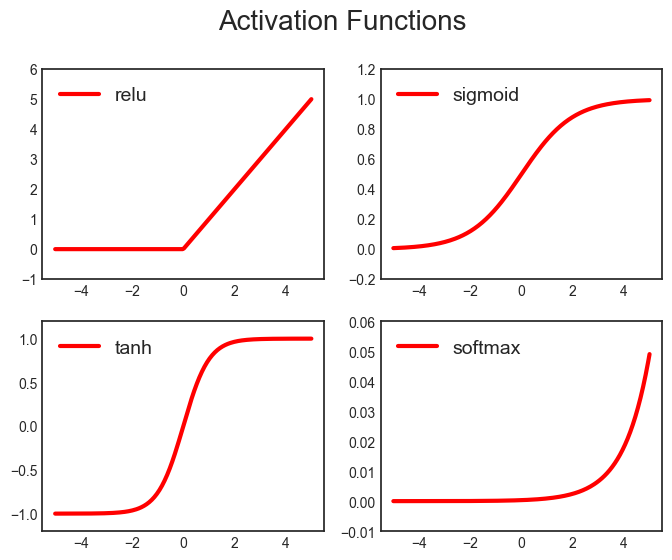

In [27]:
# New figure 1
def make_new_figure_1():

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,6))
    fig.suptitle('Activation Functions')

    # Relu
    ax1.plot(x_grid_np, y_relu, c='red', label='relu')
    ax1.set_ylim((-1, 6)); ax1.legend()

    # Sigmoid
    ax2.plot(x_grid_np, y_sigmoid, c='red', label='sigmoid')
    ax2.set_ylim((-0.2, 1.2)); ax2.legend()

    # Tanh
    ax3.plot(x_grid_np, y_tanh, c='red', label='tanh')
    ax3.set_ylim((-1.2, 1.2)); ax3.legend()

    # Softmax
    ax4.plot(x_grid_np, y_softmax, c='red', label='softmax')
    ax4.set_ylim((-0.01, 0.06)); ax4.legend();

make_new_figure_1()

| Função                           | Gráfico                   | Interpretação                                                                                                                                                                                                                                                                                                                                                                                                                                |
| -------------------------------- | ------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **ReLU (Rectified Linear Unit)** | Gráfico superior esquerdo | - Para entradas negativas, a saída é **zero** <br>- Para entradas positivas, a saída é **linear** (igual à entrada) <br>- Principal vantagem: **evita o problema de gradientes muito pequenos para $z > 0$**                                                                                                                                                                                                                               |
| **Sigmoid**                      | Gráfico superior direito  | - Saída sempre entre **0 e 1** <br>- Curva em forma de "S" suave <br>- Pode causar o problema de **vanishing gradient** para entradas muito grandes ou muito pequenas (gradientes muito próximos de zero nas extremidades)                                                                                                                                                                                                                   |
| **Tanh (Tangente Hiperbólica)**  | Gráfico inferior esquerdo | - Saída entre **-1 e 1** <br>- Também tem formato em "S", mas é centrada em zero, o que costuma ser melhor que a sigmoide para algumas redes <br>- Também sofre de **vanishing gradient**                                                                                                                                                                                                                                                    |
| **Softmax**                      | Gráfico inferior direito  | - Transforma um vetor de entradas (logits) em **probabilidades que somam 1** <br>- Nesse caso, como aplicamos Softmax a um vetor unidimensional de $x$, o gráfico mostra como a **probabilidade cresce exponencialmente com o aumento de $x$** <br>- Em problemas reais, a Softmax normalmente é aplicada sobre **um vetor com várias dimensões (uma dimensão por classe)**, não sobre uma única variável contínua |


- Na prática, escolher a função de ativação certa pode ter **grande impacto na performance da rede**, tanto em termos de capacidade de aprendizado quanto de velocidade de convergência.


***Otimização e Gradiente Descendente***

Agora que entendemos como o PyTorch calcula os **gradientes automaticamente** usando o grafo computacional, vamos discutir como esses gradientes são utilizados para **atualizar os parâmetros da rede**.

* **Gradiente Descendente** (*Gradient Descent* - é o mais comum). Segue os seguintes passos fundamentais:

  1. **Inicializar os parâmetros** (pesos e bias da rede) com valores aleatórios (ou com alguma estratégia específica).

  2. **Calcular a perda (*Loss Function*)**: Avaliar o quão ruim a previsão da rede está em relação aos dados reais.

  3. **Calcular os gradientes**: Usando o autograd, obter as derivadas da função de perda com relação a cada parâmetro.

  4. **Atualizar os parâmetros**: Mover os parâmetros na direção oposta ao gradiente (direção de maior declínio da perda).

  5. **Repetir os passos de 1 a 4** até que a perda atinja um valor satisfatório (ou até um número pré-definido de iterações).

Como vimos anteriormente, o processo busca "descer a colina" da função de perda até um **mínimo local (ou global)**.

**Exemplo Didático: Gradiente Descendente em Regressão Linear**

Para entender melhor como a otimização funciona, vamos começar com um exemplo simples de **regressão linear**, que pode ser vista como a **rede neural mais simples possível** (uma única camada linear, sem função de ativação).

A equação da regressão linear simples é:

$$
\hat{y} = w \cdot x + b
$$


***Gerando os Dados:***

Vamos criar um conjunto de dados sintético:

In [28]:
# Semente para reprodutibilidade
np.random.seed(42)

N = 100  # Número de observações

# Variável independente (x)
x = np.sort(np.random.rand(N, 1), axis=0)

# Erro aleatório
e = 0.1 * np.random.randn(N, 1)

# Função verdadeira (não-linear)
y_true = 1 + 2 * x - 3 * x**2

# Variável dependente com ruído
y = y_true + e

Vamos plotar os dados

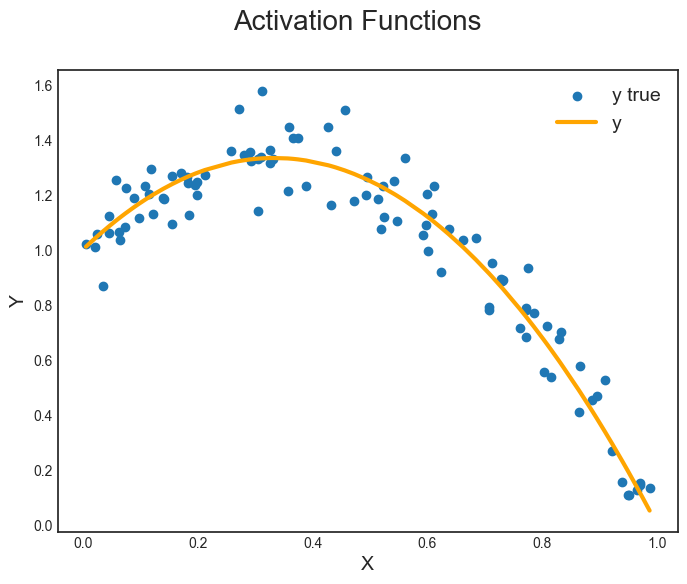

In [29]:
# New figure 2
def make_new_figure_2():
    
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('Activation Functions')

    ax.scatter(x,y); 
    ax.plot(x,y_true,color='orange'); 
    ax.set_xlabel('X'); ax.set_ylabel('Y');
    ax.legend(['y true','y']);

make_new_figure_2()

Se tentássemos ajustar uma **reta** (modelo linear simples) nesses dados, teríamos um erro alto, pois claramente a relação entre $x$ e $y$ é **não-linear**. Este é o tipo de problema onde **Redes Neurais** começam a mostrar sua vantagem. Elas podem aprender aproximações para **qualquer função não-linear**, desde que a arquitetura e o treinamento sejam adequados.

* Objetivo: Ajustar uma reta da forma

$$
\hat{y}_i = a + b \cdot x_i
$$

Utilizando **descida de gradiente manual**, com **atualização iterativa dos parâmetros $a$ e $b$**.


***Função de Custo: Erro Quadrático Médio (MSE)***

A função objetivo será o **Mean Squared Error (MSE)**:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)^2
$$

Onde:

- $y_i$ são os valores reais
- $\hat{y}_i$ são as previsões


***Gradientes dos Parâmetros***

As derivadas parciais do MSE com relação aos parâmetros são:

$$
\frac{\partial MSE}{\partial a} = -\frac{2}{N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)
$$

$$
\frac{\partial MSE}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} x_i \cdot \left( y_i - \hat{y}_i \right)
$$

Algoritmo de Gradiente Descendente

O ciclo de atualização dos parâmetros segue:

1. **Inicializar $a$ e $b$ com valores aleatórios**
2. Calcular o **erro quadrático médio (MSE)**
3. Calcular os **gradientes de $a$ e $b$**
4. **Atualizar os parâmetros**:

$$
a \leftarrow a - \eta \cdot \frac{\partial MSE}{\partial a}
$$

$$
b \leftarrow b - \eta \cdot \frac{\partial MSE}{\partial b}
$$

Onde $\eta$ é a **taxa de aprendizado (*learning rate*)**.

5. Repetir até convergência (ou até um número pré-definido de épocas).




In [36]:
np.random.seed(42)

a = np.random.randn(1)
b = np.random.randn(1)

print(f'Valores iniciais: a = {a}, b = {b}')

Valores iniciais: a = [0.49671415], b = [-0.1382643]


Função de Plotagem para Acompanhamento Visual:

In [37]:
# Plot gradient 
def gradient_plot(x, y, y_hat, y_true, EPOCHS, losses):
    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    
    # First figure
    ax1.clear()
    ax1.scatter(x, y)
    ax1.plot(x, y_true, 'orange')
    ax1.plot(x, y_hat, 'r-')
    ax1.set_title('Data and Fit')
    ax1.legend(['True', 'y', 'Predicted'])
    
    # Second figure
    ax2.clear()
    ax2.plot(range(len(losses)), losses, color='g')
    ax2.set_xlim(0,EPOCHS); ax2.set_ylim(0,1.1*np.max(losses))
    ax2.set_title('True MSE = %.4f' % losses[-1])
    
    # Plot
    plt.show();

Loop de Treinamento (Gradient Descent Manual):


In [38]:
# Hiperparâmetros
LR = 0.1        # Learning rate
EPOCHS = 200    # Número de épocas

Para reforçar, o termo **"época" (epoch)** em Machine Learning e Deep Learning se refere a **uma passagem completa por todo o conjunto de dados de treinamento**.

Agora podemos plotar o treinamento e o resultado.

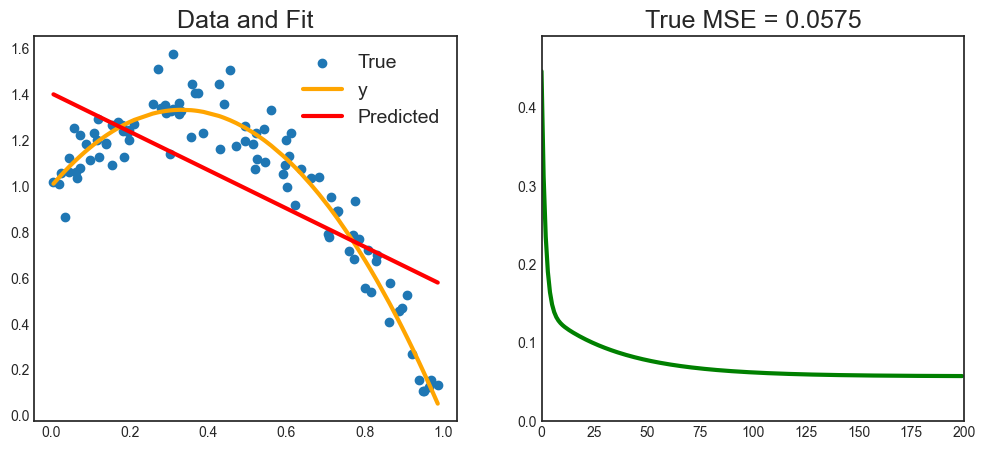

[1.40589939] [-0.83739496]


In [39]:
# New figure 3
def make_new_figure_3(a, b):
    
    # Init
    losses = []

    # train
    for t in range(EPOCHS):

        # compute loss
        y_hat = a + b * x
        error = (y - y_hat)
        loss = (error**2).mean()

        # compute gradient
        a_grad = -2 * error.mean()
        b_grad = -2 * (x * error).mean()

        # update parameters
        a -= LR * a_grad
        b -= LR * b_grad

        # plot
        losses += [loss]
        if (t+1) % (EPOCHS/25) == 0: # print 25 times
            gradient_plot(x, y, y_hat, y_true, EPOCHS, losses)

    print(a, b)
    return a, b

a_fit, b_fit = make_new_figure_3(a, b)

**O que devemos observar:**

- Como o MSE diminui ao longo das épocas.
- Como a reta ajustada vai gradualmente se aproximando da forma dos dados.
- Como o cálculo dos gradientes, embora simples aqui, é a base do treinamento de redes neurais mais complexas.


Antes de avançarmos para o PyTorch, vamos comparar os **parâmetros ajustados via Gradiente Descendente (GD)** com os **estimados pelo método tradicional de Regressão Linear via Mínimos Quadrados (OLS)**:

In [40]:
# Estimativa via OLS (usando scikit-learn)
ols = LinearRegression()
ols.fit(x, y)
print(f'Intercepto OLS: {ols.intercept_}')
print(f'Coeficiente OLS: {ols.coef_[0]}')

Intercepto OLS: [1.4345303]
Coeficiente OLS: [-0.89397853]


Os valores de $a$ e $b$ obtidos manualmente via GD devem estar **razoavelmente próximos** dos obtidos via OLS (não idênticos, pois usamos um número limitado de épocas e uma taxa de aprendizado finita).


***Comparando graficamente as soluções: GD vs OLS vs Função Verdadeira***

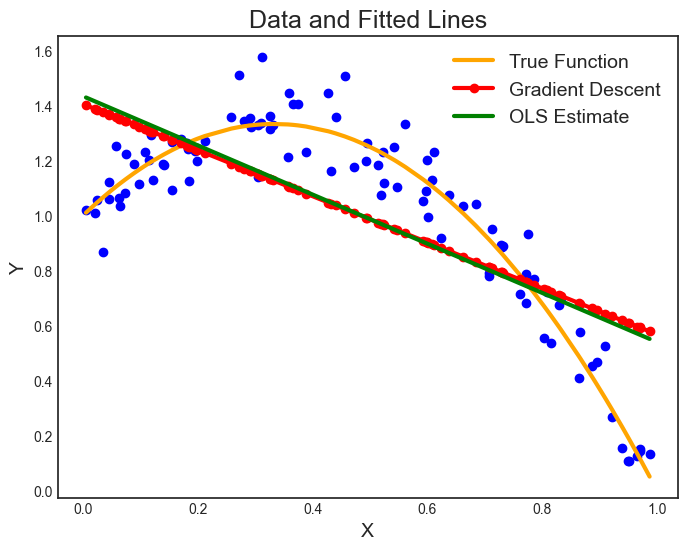

In [41]:
def make_new_figure_4():
    fig, ax = plt.subplots(figsize=(8, 6))

    # Linha da função verdadeira
    ax.plot(x, y_true, color='orange', label='True Function')

    # Linha ajustada pelo GD manual
    ax.plot(x, a_fit + b_fit * x, color='red', marker='o', label='Gradient Descent')

    # Linha ajustada pelo OLS
    ax.plot(x, ols.predict(x), color='green', label='OLS Estimate')

    # Dados observados
    ax.scatter(x, y, color='blue')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Data and Fitted Lines')
    ax.legend()

make_new_figure_4()

As três linhas estão próximas, o que valida a implementação manual do Gradiente Descendente.

#### Autograd: Calculando Gradientes Automaticamente

Agora vamos formalmente abandonar o cálculo manual de gradientes e passar a usar o sistema de **autodiferenciação automática do PyTorch: o Autograd**. 

Como o Autograd funciona na prática?

   1. **Definimos os parâmetros como tensores com `requires_grad=True`**, indicando ao PyTorch que queremos rastrear as operações feitas com eles.
   2. Durante o **forward pass**, o PyTorch constrói automaticamente o **grafo computacional** com todas as operações realizadas.
   3. No final, após calcular a **função de perda**, chamamos o método: `loss.backward()`
      * Esse comando diz ao PyTorch: **"Calcule todos os gradientes, a partir da loss, em relação a todos os parâmetros que possuem requires_grad=True"**.
   4. Os gradientes calculados ficam armazenados no atributo `.grad` de cada tensor (exemplo: `a.grad`, `b.grad`).


Importante: Gradientes acumulados

Por padrão, o PyTorch **acumula os gradientes a cada chamada de `.backward()`**. Por isso, após cada atualização de parâmetros, é **fundamental zerar os gradientes**, com:

```python
a.grad.zero_()
b.grad.zero_()
```

O **sublinhado `_`** no final significa que a operação é feita **"in place"**, ou seja, **modifica o próprio tensor sem criar uma cópia**.


***Implementando a otimização com Autograd***

Primeiro, vamos converter nossos dados `x` e `y` (que ainda estão como NumPy arrays) para **Tensores do PyTorch**:


In [42]:
# Convertendo os dados
x_tensor = torch.from_numpy(x).float().to('cpu')
y_tensor = torch.from_numpy(y).float().to('cpu')

print(type(x), type(x_tensor))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


Estamos convertendo de arrays NumPy para tensores PyTorch, garantindo que o tipo de dado seja float e que os tensores fiquem armazenados na CPU (e não na GPU)

***Inicializando os parâmetros como Tensores com Gradiente:***

In [43]:
torch.manual_seed(42)

# Inicializando os parâmetros a e b
a = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')
b = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')

***Loop de Treinamento com Autograd:***

Agora, vamos rodar o ***gradient descent automático***, com o PyTorch cuidando dos gradientes para nós:


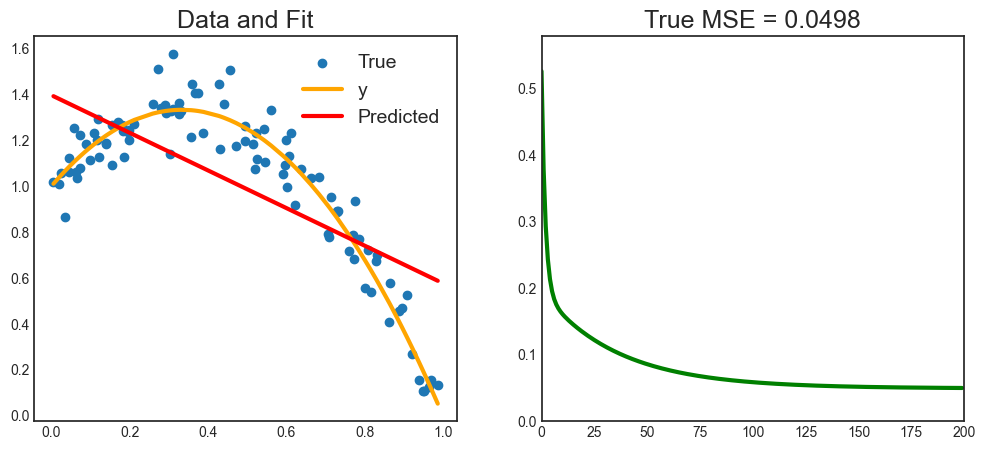

Parâmetros finais: a = 1.3977994918823242, b = -0.8213871121406555


In [ ]:
def make_new_figure_5(a, b):
    losses = []
    LR = 0.1
    EPOCHS = 200

    for t in range(EPOCHS):
        # Forward Pass
        y_hat = a + b * x_tensor
        error = y_tensor - y_hat
        loss = (error ** 2).mean()

        # Backward Pass (cálculo automático dos gradientes)
        loss.backward()

        # Atualização dos parâmetros
        with torch.no_grad():
            a -= LR * a.grad # (subtração com atribuição) Forma abreviada de escrever: a = a - learning_rate * a.grad
            b -= LR * b.grad

        # Zerando os gradientes
        a.grad.zero_()
        b.grad.zero_()

        # Guardando a loss para plot
        losses.append(((y_true - y_hat.detach().numpy()) ** 2).mean())

        # Atualizando o gráfico periodicamente
        if (t+1) % (EPOCHS // 25) == 0:
            gradient_plot(x, y, y_hat.data.numpy(), y_true, EPOCHS, losses)

    print(f'Parâmetros finais: a = {a.item()}, b = {b.item()}')

make_new_figure_5(a, b)

- O código ficou **mais limpo e conciso**.
- **Não precisamos mais calcular gradientes manualmente**.
- Toda a lógica de retropropagação é feita automaticamente pelo PyTorch.
- O resultado final foi semelhante ao da nossa implementação manual anterior.

#### Otimizador: Automatizando a Atualização dos Parâmetros

Até agora, estávamos **atualizando manualmente os parâmetros ($a$, $b$)**, subtraindo o gradiente vezes a taxa de aprendizado (**learning rate**), usando o bloco:

```python
with torch.no_grad():
    a -= LR * a.grad
    b -= LR * b.grad
```

Essa abordagem funciona bem para dois parâmetros...  
**Mas e se estivermos treinando uma rede com milhares (ou milhões) de parâmetros?**

***A solução: Otimizadores do PyTorch***

O PyTorch oferece uma variedade de **otimizadores prontos**, como:

- **SGD** (Stochastic Gradient Descent)
- **Adam**
- **RMSProp**
- Entre outros.

Esses otimizadores cuidam **automaticamente de toda a atualização dos parâmetros**, incluindo detalhes como:

- Escolha da taxa de aprendizagem
- Acúmulo de momentos (em otimizadores como Adam)
- Regularização (se desejado)


***Como o Otimizador funciona?***

O ciclo de treino com um otimizador PyTorch geralmente segue o seguinte padrão:

1. **Zerar os gradientes anteriores:**

```python
optimizer.zero_grad()
```

2. **Calcular a Loss:**

```python
loss = loss_func(y_pred, y_true)
```

3. **Calcular os gradientes via backpropagation:**

```python
loss.backward()
```

4. **Atualizar os parâmetros automaticamente:**

```python
optimizer.step()
```


***Implementação: Usando o Otimizador SGD (*Stochastic Gradient Descent*)***

Primeiro, vamos **inicializar os parâmetros** novamente:


In [45]:
torch.manual_seed(42)

a = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')
b = torch.randn(1, requires_grad=True, dtype=torch.float, device='cpu')

***Definindo o Otimizador:***

Agora criamos um **otimizador SGD**, passando:

- A lista dos parâmetros que queremos otimizar
- A taxa de aprendizado `lr`

In [46]:
optimizer = torch.optim.SGD([a, b], lr=LR)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


***Usando uma Função de Perda Padrão (MSELoss)***

Antes, calculávamos a Loss manualmente com:

```python
loss = (error ** 2).mean()
```

Agora podemos usar a classe `torch.nn.MSELoss()`:

In [47]:
loss_func = torch.nn.MSELoss()
print(loss_func)

MSELoss()


***Treinando o Modelo Usando o Otimizador***

Aqui está o novo *loop* de treinamento, agora usando o otimizador e a função de perda padrão:


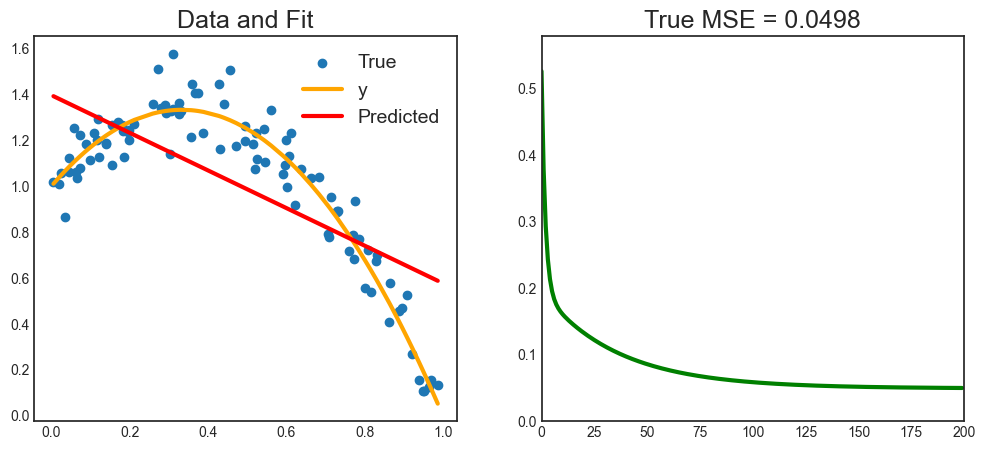

Parâmetros finais: a = 1.3978, b = -0.8214


In [48]:
def make_new_figure_6(a, b):
    EPOCHS = 200
    losses = []

    for t in range(EPOCHS):
        # Forward Pass
        y_hat = a + b * x_tensor

        # Calculando a loss com a função oficial do PyTorch
        loss = loss_func(y_hat, y_tensor)

        # Backward e Atualização
        optimizer.zero_grad()  # Limpa os gradientes anteriores
        loss.backward()        # Calcula os novos gradientes
        optimizer.step()       # Atualiza os parâmetros automaticamente

        # Guardando a loss para plot
        losses.append(((y_true - y_hat.detach().numpy()) ** 2).mean())

        # Atualizando os gráficos periodicamente
        if (t+1) % (EPOCHS // 25) == 0:
            gradient_plot(x, y, y_hat.data.numpy(), y_true, EPOCHS, losses)

    print(f'Parâmetros finais: a = {a.item():.4f}, b = {b.item():.4f}')

make_new_figure_6(a, b)

- **O código está ficando mais compacto**.
- **Estamos delegando ao PyTorch tanto o cálculo dos gradientes quanto a atualização dos parâmetros**.
- O uso de `optimizer` e `loss_func` são passos essenciais para redes mais profundas, com muitos parâmetros.


#### Construindo uma Rede Neural no PyTorch

Até agora, estávamos criando e atualizando **manualmente os parâmetros ($a$, $b$)**, e até mesmo usando o **autograd** para calcular os gradientes.

Agora, vamos dar o próximo passo:

* Vamos deixar o PyTorch cuidar de **tudo para nós**, incluindo:
  * A criação dos parâmetros  
  * O cálculo do forward pass  
  * A construção do grafo computacional  
  * O cálculo automático dos gradientes  

E mais importante: **definindo a arquitetura da rede de forma modular e reutilizável**.

***Rede Linear Mais Simples Possível***

Vamos começar criando a **rede neural mais simples que existe**, que nada mais é do que uma **regressão linear "embrulhada" dentro do PyTorch**.

**Arquitetura:**

- **1 entrada**
- **Nenhuma camada oculta**
- **Nenhuma função de ativação**
- **1 saída**

In [49]:
# Rede Neural mais simples: apenas uma camada linear
linear_net = nn.Sequential(nn.Linear(1, 1))
print(linear_net)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


Se verificarmos os parâmetros criados:

In [50]:
list(linear_net.parameters())

[Parameter containing:
 tensor([[-0.2191]], requires_grad=True),
 Parameter containing:
 tensor([0.2018], requires_grad=True)]

O PyTorch criou automaticamente os pesos e o bias da regressão linear!

***Função de Treinamento Geral (para qualquer rede)***

Agora criamos uma função de treinamento genérica que poderemos reutilizar para **qualquer arquitetura**:


In [51]:
def train_NN(x, y, y_true, net, optimizer, loss_func, EPOCHS):
    
    # transform variables
    x_tensor = torch.from_numpy(x).float().to('cpu')
    y_tensor = torch.from_numpy(y).float().to('cpu')

    # init 
    losses = []
    
    # train
    for t in range(EPOCHS):        

        # compute loss
        y_hat = net(x_tensor)     
        loss = loss_func(y_hat, y_tensor)    
        
        # update parameters
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients, update parameters

        # plot
        losses += [((y_true - y_hat.detach().numpy())**2).mean()]
        if (t+1) % (EPOCHS/25) == 0: # print 25 times
            gradient_plot(x, y, y_hat.data.numpy(), y_true, EPOCHS, losses)

#### Treinando a Rede Linear com SGD + MSELoss:


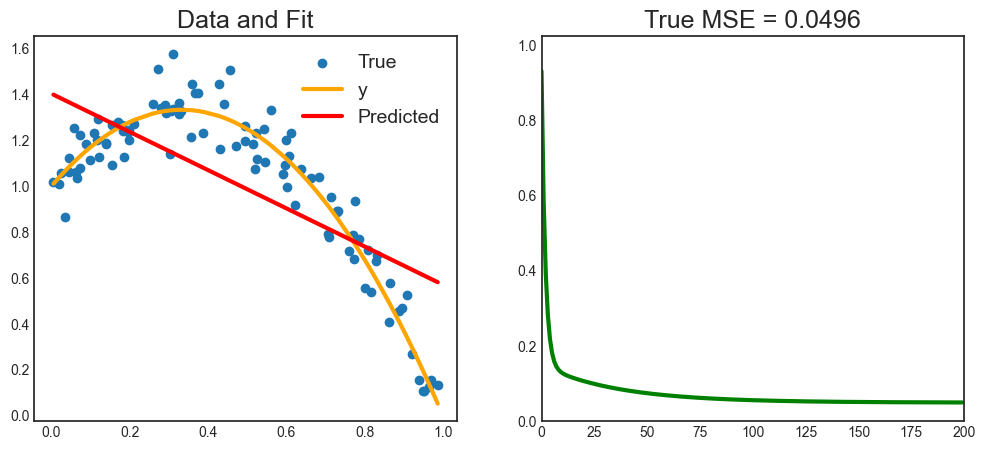

In [52]:
# Otimizador e função de perda
optimizer = torch.optim.SGD(linear_net.parameters(), lr=LR)
loss_func = nn.MSELoss()

# Treinamento
train_NN(x, y, y_true, linear_net, optimizer, loss_func, EPOCHS)

***Agora: Rede Neural com uma Camada Oculta e Função de Ativação ReLU***

Vamos construir agora uma **rede com uma *Hidden Layer* contendo 10 neurônios**, com **função de ativação ReLU**.

**Arquitetura:**

- 1 entrada
- 1 camada oculta com 10 neurônios + ReLU
- 1 saída

In [53]:
relu_net = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

print(relu_net)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


Esta rede tem muito mais parâmetros.

In [54]:
list(relu_net.parameters())

[Parameter containing:
 tensor([[-0.4869],
         [ 0.5873],
         [ 0.8815],
         [-0.7336],
         [ 0.8692],
         [ 0.1872],
         [ 0.7388],
         [ 0.1354],
         [ 0.4822],
         [-0.1412]], requires_grad=True),
 Parameter containing:
 tensor([ 0.7709,  0.1478, -0.4668,  0.2549, -0.4607, -0.1173, -0.4062,  0.6634,
         -0.7894, -0.4610], requires_grad=True),
 Parameter containing:
 tensor([[-0.0893, -0.1901,  0.0298, -0.3123,  0.2856, -0.2686,  0.2441,  0.0526,
          -0.1027,  0.1954]], requires_grad=True),
 Parameter containing:
 tensor([0.0493], requires_grad=True)]

***Treinando a Rede com ReLU:***

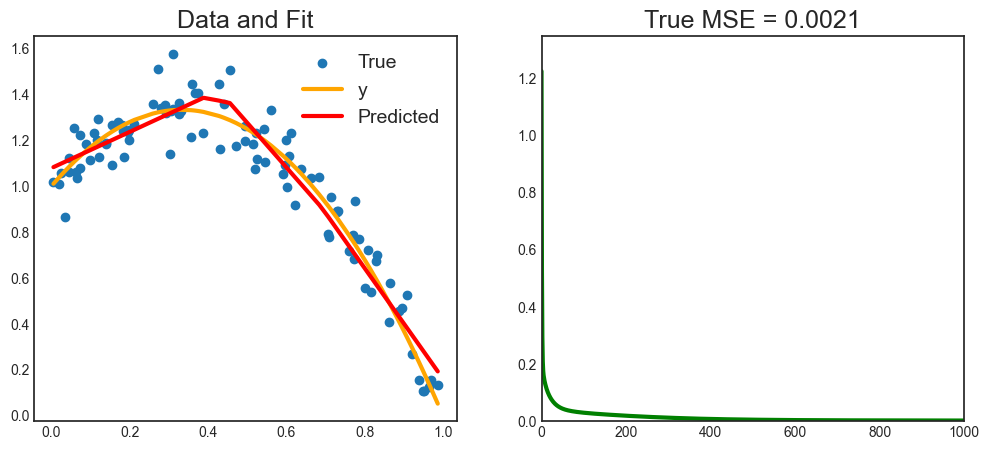

In [55]:
# Hiperparâmetros
LR = 0.1
EPOCHS = 1000

# Otimizador e função de perda
optimizer = torch.optim.SGD(relu_net.parameters(), lr=LR)
loss_func = nn.MSELoss()

# Treinamento
train_NN(x, y, y_true, relu_net, optimizer, loss_func, EPOCHS)

Agora temos muito mais parâmetros, e a capacidade da rede de aprender funções não-lineares aumentou.

***Testando uma Rede Menor (Menos Neurônios)***

Vamos tentar agora uma rede **com apenas 4 neurônios na camada oculta**, para ver se conseguimos obter um desempenho similar com uma arquitetura mais enxuta.


In [56]:
relu_net2 = nn.Sequential(nn.Linear(1, 4), nn.ReLU(), nn.Linear(4, 1) )

E treine-o.

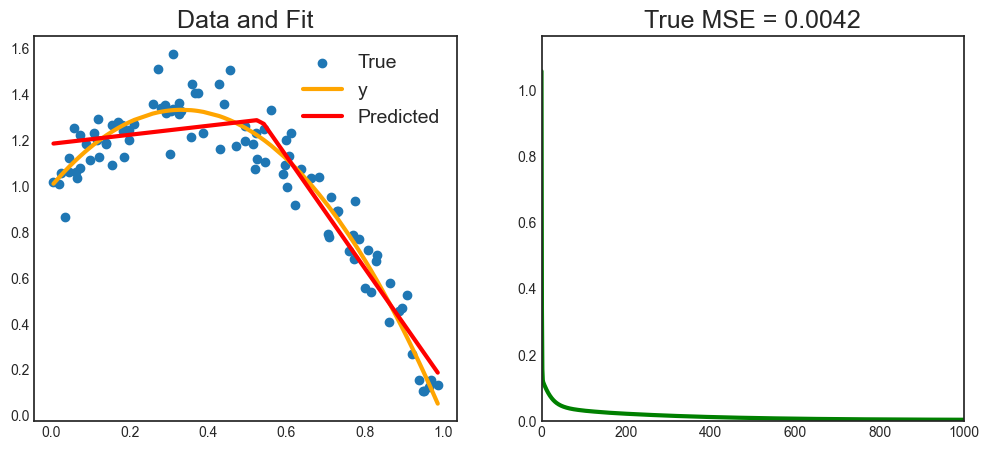

In [57]:
# Otimizador e Loss
optimizer = torch.optim.SGD(relu_net2.parameters(), lr=LR)
loss_func = nn.MSELoss()

# Treinamento
train_NN(x, y, y_true, relu_net2, optimizer, loss_func, EPOCHS)

***Trocando a Função de Ativação: Usando Tanh***

Por fim, vamos testar a mesma arquitetura anterior, mas agora usando a função de ativação **tangente hiperbólica (Tanh)**:

In [58]:
tanh_net = nn.Sequential( nn.Linear(1, 10), nn.Tanh(), nn.Linear(10, 1) )

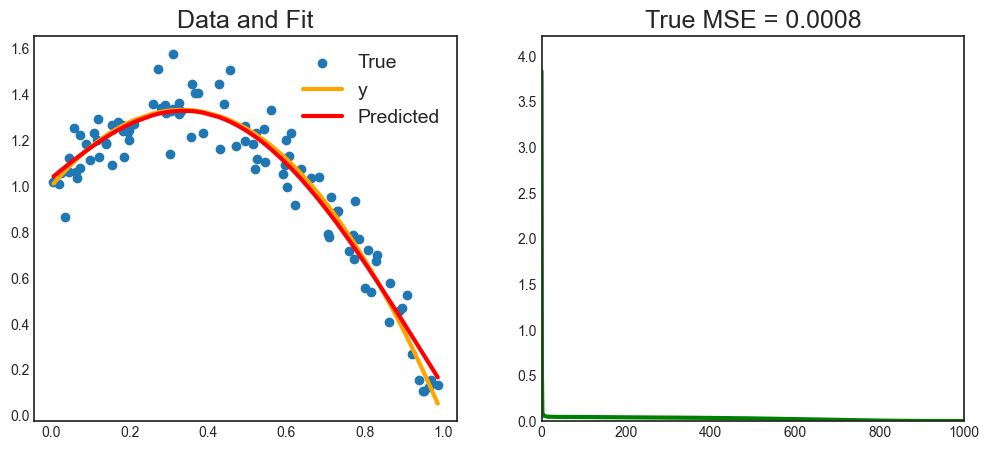

In [59]:
# Novo learning rate para melhorar a convergência com Tanh
LR = 0.2
EPOCHS = 1000

optimizer = torch.optim.SGD(tanh_net.parameters(), lr=LR)
loss_func = nn.MSELoss()

train_NN(x, y, y_true, tanh_net, optimizer, loss_func, EPOCHS)

- **Mudando a arquitetura (número de neurônios) e a função de ativação**, podemos controlar a capacidade da rede de aprender padrões não-lineares.

- O PyTorch agora cuida **automaticamente da criação dos parâmetros, do cálculo dos gradientes e da atualização dos pesos**, nos permitindo focar apenas na **arquitetura da rede e nos hiperparâmetros**.


#### Funções de Perda (Loss Functions)

Até agora, usamos apenas o **MSELoss (Mean Squared Error)** como função de perda.

Mas o PyTorch oferece diversas opções de funções de perda.  
 
Quando usamos, por exemplo, `nn.MSELoss()`, **não estamos aplicando a perda ainda**, apenas **criando o objeto da função de perda**, que depois será chamado no loop de treino.

Além disso, todas as funções de perda permitem escolher o **método de redução** (ex: média ou soma):

```python
loss_func = nn.MSELoss(reduction='mean')  # Média dos erros quadráticos
```

***Exemplos de Funções de Perda no PyTorch:***

| Função | Descrição |
|---|---|
| **MSELoss** | Erro Quadrático Médio (L2) |
| **L1Loss** | Erro Absoluto Médio (MAE) |
| **NLLLoss** | Negative Log-Likelihood Loss (usada para classificação com log-probabilidades) |
| **KLDivLoss** | Divergência de Kullback-Leibler (usada em aprendizado por distribuição) |


Comparando diferentes funções de perda:

In [60]:
LR = 0.1
EPOCHS = 25

# Criando 4 redes idênticas
n = nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 1))
nets = [n, n, n, n]

# Otimizadores para cada rede
optimizers = [torch.optim.SGD(n.parameters(), lr=LR) for n in nets]

# Diferentes funções de perda
loss_MSE = nn.MSELoss()
loss_L1 = nn.L1Loss()
loss_NLL = nn.NLLLoss()        # Só faz sentido com log-probs, mas incluímos por didatismo
loss_KLD = nn.KLDivLoss()      # Normalmente usada com distribuições

loss_funcs = [loss_MSE, loss_L1, loss_MSE, loss_L1]

# Labels para os gráficos
labels = ['MSE', 'L1', 'MSE', 'L1']

Função de treinamento múltipla:

In [61]:
def train_nets(x, y, y_true, nets, optimizers, loss_funcs, labels, EPOCHS):
    x_tensor = torch.from_numpy(x).float().to('cpu')
    y_tensor = torch.from_numpy(y).float().to('cpu')
    losses = np.zeros((0, 4))

    for epoch in range(EPOCHS):
        losses = np.vstack((losses, np.zeros((1, 4))))
        for k, net, opt, lf in zip(range(4), nets, optimizers, loss_funcs):
            y_hat = net(x_tensor)
            loss = lf(y_hat, y_tensor)
            opt.zero_grad()
            loss.backward()
            opt.step()
            losses[-1, k] = ((y_true - y_hat.detach().numpy()) ** 2).mean()
        plot_losses(losses, labels, EPOCHS)

Função para plotar as perdas:

In [62]:
def plot_losses(losses, labels, EPOCHS):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(len(losses)), losses)
    ax.set_xlim(0, EPOCHS-1)
    ax.set_ylim(0, 1.1 * np.max(losses))
    ax.set_title('Comparação entre Funções de Perda')
    ax.set_ylabel('True MSE')
    legend_txt = [f'{label} = {loss:.4f}' for label, loss in zip(labels, losses[-1, :])]
    ax.legend(legend_txt)
    plt.show()

Treinando:

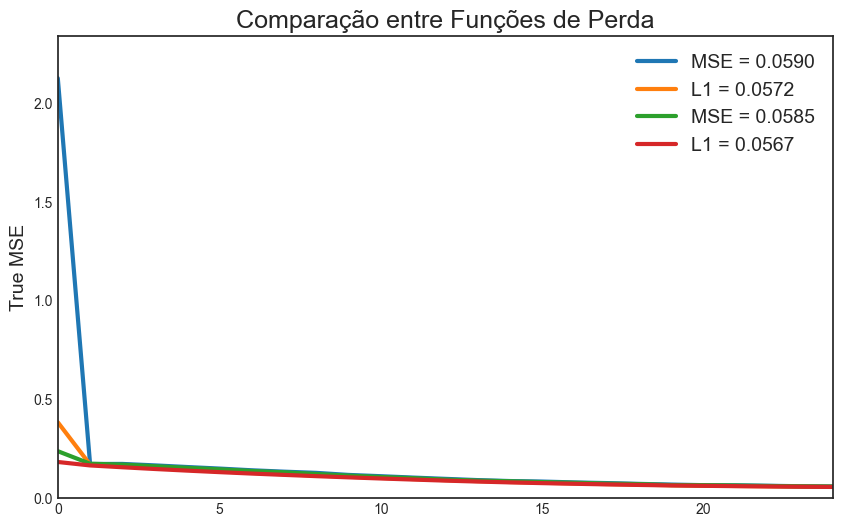

In [63]:
train_nets(x, y, y_true, nets, optimizers, loss_funcs, labels, EPOCHS)

Em um problema tão simples como o nosso, as diferenças entre funções de perda podem ser pequenas.

#### Comparando Diferentes Otimizadores

Até aqui, usamos sempre o **SGD básico**.

Agora vamos comparar outros otimizadores populares:

| Otimizador | Característica |
|---|---|
| **SGD** | Gradiente Descendente Estocástico |
| **Momentum** | Inclui um termo de inércia (momentum) para acelerar a convergência |
| **RMSprop** | Ajusta o passo de cada parâmetro de forma adaptativa |
| **Adam** | Combina momentum + escalonamento adaptativo (um dos mais usados atualmente) |


Setup dos otimizadores:

In [64]:
LR = 0.1
EPOCHS = 25

n = nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 1))
nets = [n, n, n, n]

opt_SGD = torch.optim.SGD(nets[0].parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(nets[1].parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(nets[2].parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(nets[3].parameters(), lr=LR, betas=(0.9, 0.99))

optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]
loss_funcs = [nn.MSELoss()] * 4
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']

Treinando:

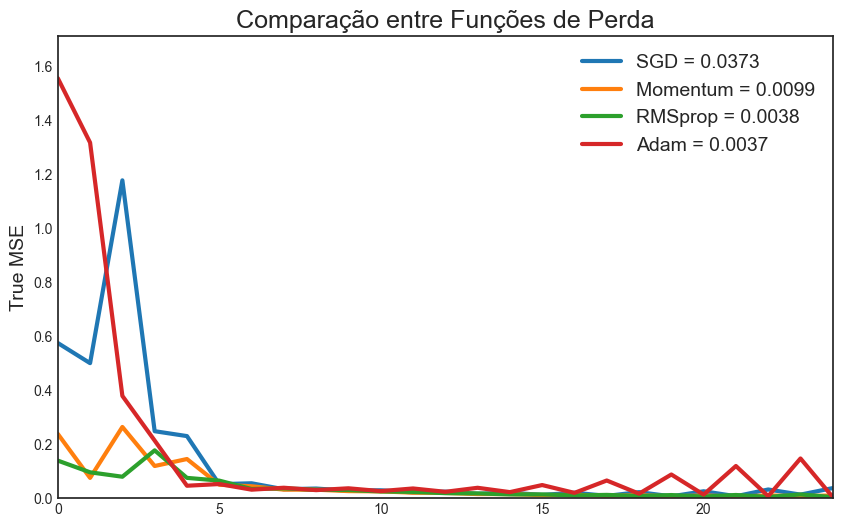

In [65]:
train_nets(x, y, y_true, nets, optimizers, loss_funcs, labels, EPOCHS)

Em redes maiores e problemas reais, **Adam** e **RMSprop** costumam ter vantagens claras em termos de velocidade de convergência.


#### Treinamento em Mini-lotes (Mini-batch Gradient Descent)

Até agora, usamos **toda a base de dados a cada atualização (Batch Gradient Descent)**.

Para problemas maiores, isso não é eficiente.

* Solução: **Mini-batches**, usando o **DataLoader do PyTorch**.

Criando um DataLoader com Mini-batches:

In [66]:
x_tensor = torch.from_numpy(x).float().to('cpu')
y_tensor = torch.from_numpy(y).float().to('cpu')
torch_dataset = Data.TensorDataset(x_tensor, y_tensor)

BATCH_SIZE = 25

loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

Divide os dados em mini-batches de tamanho 25. Embaralha os dados a cada época (por causa do shuffle=True).

Função de Treinamento com Mini-batches:

In [67]:
def train_NN_batch(loader, y_true, net, optimizer, loss_func, EPOCHS):
    losses = []

    for t in range(EPOCHS):
        for step, (batch_x, batch_y) in enumerate(loader):
            y_hat = net(batch_x)
            loss = loss_func(y_hat, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Plot por época
        y_hat = net(x_tensor)
        losses.append(((y_true - y_hat.detach().numpy()) ** 2).mean())
        if (t+1) % (EPOCHS // 25) == 0:
            gradient_plot(x, y, y_hat.data.numpy(), y_true, EPOCHS, losses)

o treinamento acontece ao longo de várias épocas, e dentro de cada época percorremos o dataset em mini-batches.

Treinando com Mini-batches:


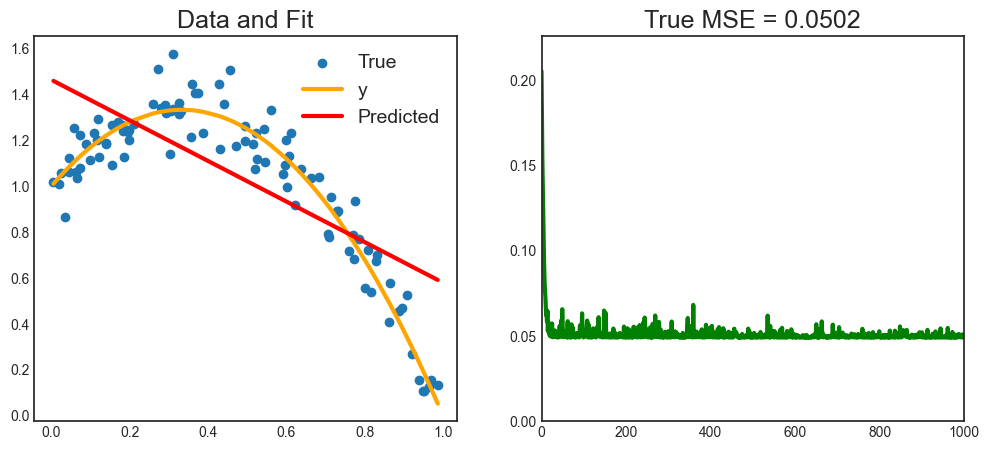

In [68]:
LR = 0.1
EPOCHS = 1000

net = nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 1))
optimizer = torch.optim.SGD(net.parameters(), lr=LR)
loss_func = nn.MSELoss()

train_NN_batch(loader, y_true, net, optimizer, loss_func, EPOCHS)

- Agora temos um **loop interno por mini-batch**, em vez de atualizar os pesos apenas no final de cada passagem completa pelos dados.  
- Isso é essencial para trabalhar com **grandes bases de dados** ou para **treinamento em GPU com paralelismo de batches**.


### Tópicos Avançados em Redes Neurais

Nesta última seção, vamos chamar a atenção para **questões práticas e conceituais importantes** que surgem ao trabalhar com Redes Neurais mais complexas.

1. **Inicialização dos Pesos**
2. **Overfitting e Regularização**
3. **Escala das Entradas**
4. **Número de Camadas e Neurônios Ocultos**
5. **Múltiplos Mínimos Locais**
6. **Redes Neurais Profundas e Deep Learning**
7. **Redes Neurais Convolucionais (CNNs)**
8. **Redes Neurais Recorrentes (RNNs)**
9. **Redes Neurais Recursivas (Recursive Neural Networks)**


***1. Inicialização dos Pesos***

* **Como os pesos são escolhidos inicialmente?**
  * Normalmente, os pesos das redes neurais são **inicializados como valores aleatórios próximos de zero**.

* **Por quê?**
  - Isso garante que o modelo **comece com um comportamento quase linear**.
  - A não-linearidade aumenta progressivamente **à medida que os pesos vão se ajustando ao longo do treinamento**.
    - OBS: Existem técnicas como **Xavier Initialization** e **He Initialization** foram desenvolvidas para melhorar a inicialização e acelerar a convergência.

***2. Overfitting e Regularização***

Redes Neurais, por sua flexibilidade, **têm alto risco de sobreajuste (overfitting)**, especialmente quando o número de parâmetros é grande.

* **Estratégias comuns para combater o overfitting:**
  - ***Early Stopping (Parada antecipada):*** Monitorar o erro de validação e parar o treinamento antes que o overfitting comece.
  - ***Regularização L2 (Weight Decay):*** Inclui um termo de penalização sobre os pesos na função de perda.
  - ***Dropout:*** Durante o treino, "desligar" aleatoriamente alguns neurônios em cada época.

***3. Escala das Entradas***

* A **escala das variáveis de entrada ($X$)** influencia fortemente a qualidade da solução.

* **Por que normalizar ou padronizar os dados?**
  - Os pesos da primeira camada da rede vão trabalhar com as escalas dos *inputs*.
  - Dados com escalas muito diferentes podem **dificultar a convergência**.
* **Recomendação padrão:** Padronizar todas as entradas para ter média zero e desvio padrão um.

***4. Número de Camadas e Neurônios Ocultos***

* **Quantas unidades ocultas devo usar? Quantas camadas?**
  - **Melhor ter neurônios em excesso do que em falta** (desde que use regularização).
  - Com poucos neurônios: **risco de underfitting**.
  - Com muitos neurônios: **a rede pode ajustar, mas precisa de regularização**.

* **Sobre o número de camadas ocultas:**
  - **Redes rasas (1 hidden layer)** conseguem capturar relações simples.
  - **Redes profundas (Deep Neural Networks)** criam **representações hierárquicas**, aprendendo padrões de baixo nível nas primeiras camadas e abstrações mais complexas nas camadas superiores.
  - [TensorFlow Playground](https://playground.tensorflow.org/).


***5. Múltiplos Mínimos Locais***

* A função de erro (*Loss Function*) em Redes Neurais é **não convexa**, o que significa:
  - **Existem muitos mínimos locais.**
  - Diferentes inicializações podem levar a soluções diferentes.

* **Soluções comuns:**
  - **Rodar o treino várias vezes e escolher o melhor modelo.**
  - **Bagging de redes (*ensemble* de múltiplas redes com diferentes inicializações).**
  - **Usar otimização com momentum ou Adam**, que ajudam a escapar de mínimos rasos.

***6. Redes Neurais Profundas e Deep Learning***
* **Redes Neurais Profundas (*Deep Neural Networks*)**: São simplesmente Redes Neurais com **mais de uma camada oculta**.

Por exemplo:

| Tipo | Número de camadas ocultas |
|---|---|
| Rede rasa | 1 camada oculta |
| Rede profunda (DNN) | 2 ou mais camadas ocultas |


***7. Redes Neurais Convolucionais (CNNs)***



<div style="text-align:center;">
    <img src="images\Neural_3.png"  alt="Imagem" style="width: 650px;"/>
</div>


* Muito utilizadas para **dados espaciais como imagens e vídeos**.
  - As **entradas são geralmente matrizes (ex: pixels RGB)**.
  - As camadas convolucionais **capturam padrões locais**, considerando apenas os pixels vizinhos.
  - Isso reduz a complexidade e permite **aprender características espaciais** (bordas, texturas, formas).

**Intuição:** Ao invés de conectar cada neurônio da camada de entrada a todos os neurônios da camada seguinte, **conectamos apenas a regiões locais**.

***8. Redes Neurais Recorrentes (RNNs)***

* Aplicadas em **dados sequenciais ou temporais**, como:
  - Séries temporais
  - Processamento de Linguagem Natural
  - Reconhecimento de fala


<div style="text-align:center;">
    <img src="images\Neural_4.png"  alt="Imagem" style="width: 650px;"/>
</div>


* **Principais características:**
  - **"Memória" de etapas anteriores:** A saída em um dado tempo $t$ depende não apenas da entrada atual, mas também do estado anterior.
  - Ex.: Previsão de palavras em uma frase.

* RNN Bidirecional:
  - As **Bidirectional RNNs** processam a sequência **nos dois sentidos**: do passado para o futuro e do futuro para o passado.
  - Muito usado em **reconhecimento de fala** ou **interpretação de textos**, onde o contexto futuro ajuda a entender melhor o passado.

***9. Redes Neurais Recursivas (Recursive Neural Networks)***

* São uma **generalização das RNNs**, aplicáveis a **estruturas de dados com forma de árvore (árvores sintáticas, por exemplo).**

**Diferença principal:**

| | RNN | Recursive NN |
|---|---|---|
| Estrutura | Linear / Sequencial | Hierárquica / Árvore |
| Exemplo típico | Texto sequencial | Parsing de linguagem natural |




### Aplicação de Redes Neurais em Python

Vamos aplicar ao mesmo conjunto de dados trabalhado anteriormente, mas agora usando uma **rede neural mais complexa**.

* Usar Kernel: Python 3.10.x
* instalar: `pip install numpy pandas matplotlib scikit-learn tensorflow keras scikeras`


In [11]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import torch
from torch.autograd import Variable
import torch.nn as nn
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [12]:
# --------------------
# Definindo features
# --------------------
features = ['Years', 'Hits', 'RBI', 'PutOuts', 'Walks', 'Runs', 'AtBat', 'HmRun']

In [14]:
# --------------------
# Carregando os dados
# --------------------
X_train = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Hitters_X_train.csv').dropna()[features]

In [15]:
X_test = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Hitters_X_test.csv').dropna()[features]

In [27]:
y_train = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Hitters_y_train.csv').dropna()['x']

In [28]:
y_test = pd.read_csv('https://github.com/Daniel-Uhr/data/raw/main/Hitters_y_test.csv').dropna()['x']

1. Pré-processamento básico

Garantir que todas as features estejam padronizadas (*standardized*). Lembre que redes neurais são muito sensíveis a escalas diferentes das variáveis.

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Conversão para tensores PyTorch

In [32]:
X_train_tensor = Variable(torch.from_numpy(X_train_scaled).float())
y_train_tensor = Variable(torch.from_numpy(y_train.values).float().view(-1, 1))

X_test_tensor = Variable(torch.from_numpy(X_test_scaled).float())
y_test_tensor = Variable(torch.from_numpy(y_test.values).float().view(-1, 1))

`.view(-1, 1))` garante que y saia da seguinte forma: [n, 1] (matriz coluna 2D).

3. Definindo a arquitetura da rede


In [33]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(X_train.shape[1], 32)   # 32 neurônios na camada oculta
        self.relu = nn.ReLU()
        self.output = nn.Linear(32, 1)                   # Saída única para regressão

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

model = SimpleNN()

4. Função de perda e otimizador

In [34]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

5. Treinamento (Training Loop)

In [35]:
n_epochs = 500

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')


Epoch [50/500], Loss: 424014.1562
Epoch [100/500], Loss: 284515.9375
Epoch [150/500], Loss: 165821.5000
Epoch [200/500], Loss: 131366.8750
Epoch [250/500], Loss: 113956.2422
Epoch [300/500], Loss: 100329.3594
Epoch [350/500], Loss: 93408.1875
Epoch [400/500], Loss: 90310.7891
Epoch [450/500], Loss: 88564.3984
Epoch [500/500], Loss: 87216.5234


6. Avaliação (Test Set Performance)

In [36]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    mse_test = nn.MSELoss()(y_pred_test, y_test_tensor).item()
    print(f'Test MSE: {mse_test:.4f}')


Test MSE: 155466.6250


Possíveis Extensões:
* Testar arquiteturas com mais camadas (deep)
* Incluir Dropout, BatchNorm, ou outras regularizações
* Testar diferentes funções de ativação (ReLU, Tanh, etc)
* Fazer um Nested CV com GridSearch para tunar hiperparâmetros
* Usar o sklearn MLPRegressor para comparar com a implementação PyTorch

usando diretamente o MLPRegressor do scikit-learn:

In [37]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Pré-processamento: Padronização das variáveis (importante para redes neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definindo o modelo
mlp = MLPRegressor(
    hidden_layer_sizes=(32,),   # Uma camada oculta com 32 neurônios
    activation='relu',          # Função de ativação ReLU
    solver='adam',              # Otimizador Adam (igual ao que você usou no PyTorch)
    learning_rate_init=0.01,    # Taxa de aprendizado
    max_iter=500,               # Número de épocas
    random_state=42             # Para reprodutibilidade
)

# Treinamento
mlp.fit(X_train_scaled, y_train)

# Previsões
y_pred_test = mlp.predict(X_test_scaled)

# Avaliação (MSE)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Test MSE: {mse_test:.4f}')

Test MSE: 155785.3108


c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
import numpy as np
import pandas as pd
import time
import warnings
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

# Functions to build Keras models

def build_lstm(input_dim=8, units=32, learning_rate=0.01):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, input_dim)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

def build_cnn(input_dim=8, filters=32, kernel_size=2, learning_rate=0.01):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(input_dim,1)))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Neural Network models
nn_models = [
    {
        'name': 'MLP_Shallow_ReLU',
        'estimator': MLPRegressor(random_state=42, max_iter=1000),
        'param_grid': {
            'model__hidden_layer_sizes': [(16,), (32,)],
            'model__activation': ['relu'],
            'model__learning_rate_init': [0.01, 0.1],
            'model__solver': ['adam']
        }
    },
    {
        'name': 'MLP_Deep_Tanh',
        'estimator': MLPRegressor(random_state=42, max_iter=1000),
        'param_grid': {
            'model__hidden_layer_sizes': [(64, 32), (128, 64)],
            'model__activation': ['tanh'],
            'model__learning_rate_init': [0.001, 0.01],
            'model__solver': ['adam']
        }
    },
    {
        'name': 'LSTM_Simple',
        'estimator': KerasRegressor(model=build_lstm, verbose=0),
        'param_grid': {
            'model__model__units': [16, 32],
            'model__model__learning_rate': [0.001, 0.01],
            'model__batch_size': [8, 16],
            'model__epochs': [100]
        }
    },
    {
        'name': 'CNN1D_Simple',
        'estimator': KerasRegressor(model=build_cnn, verbose=0),
        'param_grid': {
            'model__model__filters': [16, 32],
            'model__model__kernel_size': [2],
            'model__model__learning_rate': [0.001, 0.01],
            'model__batch_size': [8, 16],
            'model__epochs': [100]
        }
    }
]

def nested_cv_nn(X, y, estimator, param_grid, model_name, feature_names, cv_outer=5, cv_inner=3, random_state=42):
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    outer_cv = KFold(n_splits=cv_outer, shuffle=True, random_state=random_state)
    inner_cv = KFold(n_splits=cv_inner, shuffle=True, random_state=random_state)

    outer_mse, outer_r2, outer_mae, inner_mse = [], [], [], []
    permutation_importances_folds = []
    best_params_list = []
    fold_level_results = []

    exec_start = time.time()

    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

        # Reshape for LSTM and CNN
        if 'LSTM' in model_name:
            X_train_fold_np = np.expand_dims(X_train_fold.values, axis=1)
            X_test_fold_np = np.expand_dims(X_test_fold.values, axis=1)
        elif 'CNN' in model_name:
            X_train_fold_np = np.expand_dims(X_train_fold.values, axis=2)
            X_test_fold_np = np.expand_dims(X_test_fold.values, axis=2)
        else:
            X_train_fold_np = X_train_fold
            X_test_fold_np = X_test_fold

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            pipeline = Pipeline([('model', estimator)])
            grid = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring=scorer, n_jobs=-1)
            grid.fit(X_train_fold_np, y_train_fold)

        best_model = grid.best_estimator_
        best_params_list.append(grid.best_params_)
        inner_mse.append(-grid.best_score_)

        # Outer test evaluation
        y_pred = best_model.predict(X_test_fold_np)
        fold_mse = mean_squared_error(y_test_fold, y_pred)
        fold_r2 = r2_score(y_test_fold, y_pred)
        fold_mae = mean_absolute_error(y_test_fold, y_pred)

        outer_mse.append(fold_mse)
        outer_r2.append(fold_r2)
        outer_mae.append(fold_mae)

        # Permutation importance (only for MLP)
        if 'MLP' in model_name:
            perm = permutation_importance(best_model, X_test_fold, y_test_fold, n_repeats=10, random_state=random_state, scoring='neg_mean_squared_error')
            permutation_importances_folds.append(perm.importances_mean)
        else:
            permutation_importances_folds.append(np.full(len(feature_names), np.nan))

        fold_result = {
            'Model': model_name,
            'Fold': fold_idx + 1,
            'MSE': fold_mse,
            'R2': fold_r2,
            'MAE': fold_mae,
            'Best_Params': grid.best_params_,
            'Perm_Importance': permutation_importances_folds[-1].tolist(),
        }
        fold_level_results.append(fold_result)

    exec_time = time.time() - exec_start
    overfit_gap = np.mean(inner_mse) - np.mean(outer_mse)
    perm_mean = np.nanmean(permutation_importances_folds, axis=0)
    perm_std = np.nanstd(permutation_importances_folds, axis=0)

    result = {
        'Model': model_name,
        'Inner_CV_MSE_Mean': np.mean(inner_mse),
        'Outer_Test_MSE_Mean': np.mean(outer_mse),
        'Outer_Test_MSE_Std': np.std(outer_mse),
        'Outer_Test_R2_Mean': np.mean(outer_r2),
        'Outer_Test_MAE_Mean': np.mean(outer_mae),
        'Overfit_Gap': overfit_gap,
        'Exec_Time_Seconds': exec_time,
        'Best_Params_Per_Fold': best_params_list,
        'Perm_Importance_Mean': perm_mean.tolist(),
        'Perm_Importance_Std': perm_std.tolist(),
        'Outer_MSE_Folds': outer_mse,
        'Fold_Level_Results': fold_level_results
    }

    return result

# -------------------------
# Final loop for all NN models
# -------------------------
final_results = []
mse_distributions = []

for nn_config in nn_models:
    print(f"\nNested CV: {nn_config['name']}")
    result = nested_cv_nn(
        X_train,
        y_train.squeeze(),
        estimator=nn_config['estimator'],
        param_grid=nn_config['param_grid'],
        model_name=nn_config['name'],
        feature_names=X_train.columns.tolist()
    )
    final_results.append(result)
    mse_distributions.append(result['Outer_MSE_Folds'])

# Consolidate final results into a DataFrame
results_df = pd.DataFrame(final_results)




Nested CV: MLP_Shallow_ReLU

Nested CV: MLP_Deep_Tanh

Nested CV: LSTM_Simple


C:\Users\danie\AppData\Local\Temp\ipykernel_21328\4085432404.py:144: RuntimeWarning: Mean of empty slice
  perm_mean = np.nanmean(permutation_importances_folds, axis=0)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



Nested CV: CNN1D_Simple


C:\Users\danie\AppData\Local\Temp\ipykernel_21328\4085432404.py:144: RuntimeWarning: Mean of empty slice
  perm_mean = np.nanmean(permutation_importances_folds, axis=0)
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [25]:
print(results_df.to_markdown(index=False))

| Model            |   Inner_CV_MSE_Mean |   Outer_Test_MSE_Mean |   Outer_Test_MSE_Std |   Outer_Test_R2_Mean |   Outer_Test_MAE_Mean |   Overfit_Gap |   Exec_Time_Seconds | Best_Params_Per_Fold                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | Perm_Importance_Mean                                                                        

In [ ]:
def get_model_and_param_grid_nn(random_state=42):
    model = MLPRegressor(random_state=random_state, max_iter=1000)
    param_grid = {
        'model__hidden_layer_sizes': [(16,), (32,), (64,), (32,16)],
        'model__activation': ['relu', 'tanh'],
        'model__learning_rate_init': [0.001, 0.01, 0.1],
        'model__solver': ['adam', 'sgd']
    }
    return model, param_grid

def nested_cv_with_importance_nn(X, y, feature_names, cv_outer=5, cv_inner=3, random_state=42):
    model, param_grid = get_model_and_param_grid_nn(random_state=random_state)
    pipeline = Pipeline([('model', model)])
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    outer_cv = KFold(n_splits=cv_outer, shuffle=True, random_state=random_state)
    inner_cv = KFold(n_splits=cv_inner, shuffle=True, random_state=random_state)

    outer_mse, outer_r2, outer_mae, inner_mse = [], [], [], []
    permutation_importances_folds = []
    best_params_list = []
    fold_level_results = []

    exec_start = time.time()

    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            grid = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring=scorer, n_jobs=-1)
            grid.fit(X_train_fold, y_train_fold)

        best_model = grid.best_estimator_
        best_params_list.append(grid.best_params_)
        inner_mse.append(-grid.best_score_)

        y_pred = best_model.predict(X_test_fold)
        fold_mse = mean_squared_error(y_test_fold, y_pred)
        fold_r2 = r2_score(y_test_fold, y_pred)
        fold_mae = mean_absolute_error(y_test_fold, y_pred)

        outer_mse.append(fold_mse)
        outer_r2.append(fold_r2)
        outer_mae.append(fold_mae)

        # Permutation Importance
        perm = permutation_importance(best_model, X_test_fold, y_test_fold, n_repeats=10, random_state=random_state, scoring='neg_mean_squared_error')
        permutation_importances_folds.append(perm.importances_mean)

        fold_result = {
            'Model': 'MLP',
            'Fold': fold_idx + 1,
            'MSE': fold_mse,
            'R2': fold_r2,
            'MAE': fold_mae,
            'Best_Params': grid.best_params_,
            'Perm_Importance': perm.importances_mean.tolist(),
        }
        fold_level_results.append(fold_result)

    exec_time = time.time() - exec_start
    overfit_gap = np.mean(inner_mse) - np.mean(outer_mse)

    perm_mean = np.nanmean(permutation_importances_folds, axis=0)
    perm_std = np.nanstd(permutation_importances_folds, axis=0)

    result = {
        'Model': 'MLP',
        'Inner_CV_MSE_Mean': np.mean(inner_mse),
        'Outer_Test_MSE_Mean': np.mean(outer_mse),
        'Outer_Test_MSE_Std': np.std(outer_mse),
        'Outer_Test_R2_Mean': np.mean(outer_r2),
        'Outer_Test_MAE_Mean': np.mean(outer_mae),
        'Overfit_Gap': overfit_gap,
        'Exec_Time_Seconds': exec_time,
        'Best_Params_Per_Fold': best_params_list,
        'Perm_Importance_Mean': perm_mean.tolist(),
        'Perm_Importance_Std': perm_std.tolist(),
        'Outer_MSE_Folds': outer_mse,
        'Fold_Level_Results': fold_level_results
    }

    return result


In [129]:
feature_names = X_train.columns.tolist()
result_mlp = nested_cv_with_importance_nn(X_train, y_train.squeeze(), feature_names)


In [130]:
import pandas as pd

# Visualizar o resumo geral
pd.DataFrame([result_mlp])

,Model,Inner_CV_MSE_Mean,Outer_Test_MSE_Mean,Outer_Test_MSE_Std,Outer_Test_R2_Mean,Outer_Test_MAE_Mean,Overfit_Gap,Exec_Time_Seconds,Best_Params_Per_Fold,Perm_Importance_Mean,Perm_Importance_Std,Outer_MSE_Folds,Fold_Level_Results
0,MLP,122866.089101,108892.045599,38290.795234,0.363994,236.568483,13974.043502,34.003303,"[{'model__activation': 'relu', 'model__hidden_...","[69247.7721446002, 196786.53271808507, 79064.3...","[37124.89384118863, 85746.14092990263, 138502....","[81287.92621593025, 162796.19845887474, 137852...","[{'Model': 'MLP', 'Fold': 1, 'MSE': 81287.9262..."


In [131]:
print(result_mlp.to_markdown(index=False))

AttributeError: 'dict' object has no attribute 'to_markdown'

### Conclusão

Vimos:
- Como uma Rede Neural opera desde uma regressão linear até arquiteturas com múltiplas camadas.
- O papel de funções de ativação, otimizadores, funções de perda e mini-batches.
- Conceitos fundamentais de regularização e arquitetura de rede.
- Um panorama das principais variantes avançadas de redes neurais.

Estudos futuros:
- CNNs
- RNNs
- LSTMs
- Transformers
- Regularização Avançada
- Técnicas de tuning em Deep Learning